In [291]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [292]:
def load_dataset(filename):
    return np.loadtxt(filename)

In [293]:
def plot_dataset(dataset):
    X = dataset[:,0]
    Y = dataset[:,1]
   # plt.scatter(X,Y)

In [294]:
dataset = load_dataset('ex1data1.txt')
#plot_dataset(dataset)

In [329]:
def split_dataset(dataset,split_ratio):
    #randomizing the dataset to ensure same distribution across train , dev and test sets   
    np.random.seed(42)
    shuffled_dataset = np.random.permutation(len(dataset))
   
    #split_ratio : a dictionary with ratios in this cas 60 20 20
    dev_ratio   = split_ratio["dev_ratio"  ]
    train_ratio = split_ratio["train_ratio"]
    test_ratio  = split_ratio["test_ratio" ]
   
    train_set = np.take(dataset,shuffled_dataset[ :int(test_ratio*len(dataset))],axis=0)
    dev_set   = np.take(dataset,shuffled_dataset[len(train_set):len(train_set)+int(dev_ratio*len(dataset)) ],axis=0)
    test_set  = np.take(dataset,shuffled_dataset[len(train_set)+len(dev_set):],axis=0)
    return train_set , dev_set ,test_set

In [330]:
split_ratio = {"dev_ratio" :.2 , "train_ratio" :.2 , "test_ratio" : .6 }
train_set , dev_set ,test_set = split_dataset(dataset,split_ratio)

[[21.279   17.929  ]
 [ 5.4069   0.55657]
 [ 5.3054   1.9869 ]
 [ 6.4296   3.6518 ]
 [ 5.1884   0.20421]
 [ 9.7687   7.5435 ]
 [18.959   17.054  ]
 [11.708    5.3854 ]
 [ 5.7107   3.2522 ]
 [ 6.1101  17.592  ]
 [ 6.5894   5.9966 ]
 [ 6.5479   0.29678]
 [ 5.8014   1.844  ]
 [12.828   13.501  ]
 [ 7.8247   6.7318 ]
 [ 5.8598   6.8233 ]
 [ 5.4901   4.263  ]
 [ 5.734    3.1551 ]
 [ 5.0594   2.8214 ]
 [ 7.2259   3.3411 ]
 [ 5.5416   1.0179 ]
 [10.136    6.6799 ]
 [ 5.4994   1.0173 ]
 [ 5.3794   3.5129 ]
 [ 6.3534   5.4974 ]
 [ 5.8918   1.8495 ]
 [ 5.0546   3.8166 ]
 [ 5.7292   0.47953]
 [14.164   15.505  ]
 [ 7.2182   4.8852 ]
 [13.394    9.0551 ]
 [ 5.2524  -1.22   ]
 [13.176   14.692  ]
 [ 6.002    0.92695]
 [ 8.3829  11.886  ]
 [ 7.0931   1.0463 ]
 [20.341   20.992  ]
 [ 7.9334   4.5623 ]
 [ 6.3654   5.3048 ]
 [ 6.0062   1.2784 ]
 [ 8.2111   6.5426 ]
 [ 8.5781  12.     ]
 [ 6.3589  -1.4211 ]
 [10.957    7.0467 ]
 [ 7.0708   5.3893 ]
 [ 5.1077   2.0576 ]
 [18.945   22.638  ]
 [ 7.6031   4

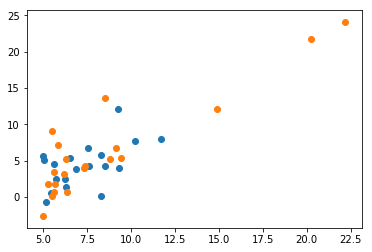

In [331]:

plt.scatter(dev_set[:,0],dev_set[:,1] )
plt.scatter(test_set[:,0],test_set[:,1] )
print(train_set)

In [332]:
def normalize_input(train_set):
    m = len(train_set)
    X    =  train_set[:,0]
    mean =  (1./m)*np.sum(X)
    X    =  X-mean  
    var  =  (1./m)*np.sum(X**2)
    return X/var

In [356]:
def compute_cost(Y_par,Y) :
    m = len(Y)
    cost = (1/(2*m))*np.sum(np.square(Y_par-Y))
    return cost

In [357]:
def weight_init(shape):
    W = np.zeros((shape,1))
    return W 


In [358]:
def ubdate_weights(W,dW,learning_rate):
    W -= dW*learning_rate 
    return W

In [367]:
def gradient_decent(train_set,learning_rate,epochs,lambd = None) :
   
    X =np.expand_dims(train_set[:,train_set.shape[1]-2],axis = 1)
    Y = np.expand_dims(train_set[:,train_set.shape[1]-1],axis = 1)
    X =np.concatenate([np.ones((X.shape[0],1)),X],axis =1 )
  
    cost_history = []
    W = weight_init(X.shape[1])
    m = len(train_set)
    for i in range(epochs):
    
        Z = np.dot(X,W)

        
        dW  = (1./m)*np.dot(X.T,Z-Y)
        
        ubdate_weights(W,dW,learning_rate)
        
        cost_history.append(compute_cost(Z,Y))
     
    return W , cost_history
    

[[-3.63029144]
 [ 1.16636235]]


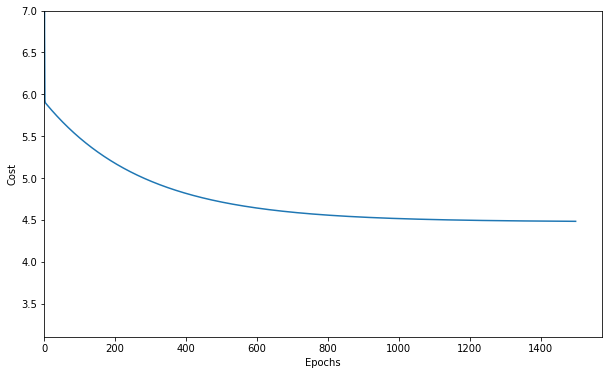

In [375]:
W, cost = gradient_decent(dataset,.01,1500,lambd = None)
plt.figure(figsize=(10,6))
plt.plot(cost)
plt.xlim(xmin=0)
plt.ylim(ymax=7)
plt.ylabel('Cost')
plt.xlabel('Epochs');
print (W)

In [381]:
def dev_set_eval(dev_set,W):
    X=np.expand_dims(dev_set[:,dev_set.shape[1]-2],axis = 1)
    Y = np.expand_dims(dev_set[:,dev_set.shape[1]-1],axis = 1)
    X =np.concatenate([np.ones((X.shape[0],1)),X],axis =1 )
    Z=np.dot(X,W)
   #print( ' Z={}  Y = {}  error = {}'.format(Z,Y,Z-Y) )
    error = np.sum((abs(Z-Y)))
    print (error)

In [382]:
dev_set_eval(dataset,W)

214.44719174406603
